# Predicting House Prices with Linear Regression

In this Notebook, I will be showcasing my ability to use regression algorithms - a type of surpervised machine learning techniques which involve training a model to operate on a set of features and predict a label using a dataset that includes some already-known label values - to create a  model that quantitatively relates house prices with variables such as bedrooms, bathrooms, square feet of basement etc.  The data utilize for this analysis is the property dataset from the Kaggle website. https://www.kaggle.com/code/engrahsantariq/house-price-prediction-using-linear-regressi/data

In [35]:
import pandas as pd

#Load the training data set 
housing_data = pd.read_csv("/Users/edithimeah/Documents/Portfolio/property.csv")
housing_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,floors,waterfront,view,condition,grade
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1180,0,1955,0,1.0,0,0,3,7
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2170,400,1951,1991,2.0,0,0,3,7
2,5631500400,20150225T000000,180000,2,1.00,770,10000,770,0,1933,0,1.0,0,0,3,6
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1050,910,1965,0,1.0,0,0,5,7
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1680,0,1987,0,1.0,0,0,3,8


In this dataset, the price column represents the label (the y value) our model must be trained to predict. The other columns are potential features (x values).

In [36]:
# Let's take a look at the dimension of the data 
housing_data.shape

(21613, 16)

In [37]:
housing_data.dtypes

id                 int64
date              object
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
dtype: object

In [38]:
## The date feature is not useful to the analysis, so I will go ahead and remove it from the dataset
del housing_data['date']
housing_data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,floors,waterfront,view,condition,grade
0,7129300520,221900,3,1.00,1180,5650,1180,0,1955,0,1.0,0,0,3,7
1,6414100192,538000,3,2.25,2570,7242,2170,400,1951,1991,2.0,0,0,3,7
2,5631500400,180000,2,1.00,770,10000,770,0,1933,0,1.0,0,0,3,6
3,2487200875,604000,4,3.00,1960,5000,1050,910,1965,0,1.0,0,0,5,7
4,1954400510,510000,3,2.00,1680,8080,1680,0,1987,0,1.0,0,0,3,8


## Explore the data 
1. Check for missing data
2. Use the dataframe describe method to generate decriptive statitics of numerical features. 
3. Correlation matrix
4. Visulize features to check for relationship between each features and label

In [19]:
## Check for missing value for each feature 
housing_data.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
floors           0
waterfront       0
view             0
condition        0
grade            0
dtype: int64

Features has no missing value. 

In [41]:
numeric_features = ['bathrooms', 'bedrooms','sqft_living', 'sqft_lot', 'sqft_above','sqft_basement',
                               'floors']
housing_data[numeric_features + ['price']].describe()

,bathrooms,bedrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,floors,price
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04
mean,2.114757,3.370842,2079.899736,1.510697e+04,1788.390691,291.509045,1.494309,5.401822e+05
std,0.770163,0.930062,918.440897,4.142051e+04,828.090978,442.575043,0.539989,3.673622e+05
min,0.000000,0.000000,290.000000,5.200000e+02,290.000000,0.000000,1.000000,7.500000e+04
25%,1.750000,3.000000,1427.000000,5.040000e+03,1190.000000,0.000000,1.000000,3.219500e+05
50%,2.250000,3.000000,1910.000000,7.618000e+03,1560.000000,0.000000,1.500000,4.500000e+05
75%,2.500000,4.000000,2550.000000,1.068800e+04,2210.000000,560.000000,2.000000,6.450000e+05
max,8.000000,33.000000,13540.000000,1.651359e+06,9410.000000,4820.000000,3.500000,7.700000e+06


In [53]:
corr_matrix = housing_data.corr()
corr_matrix["price"].sort_values(ascending=False)


price            1.000000
sqft_living      0.702044
grade            0.667463
sqft_above       0.605566
bathrooms        0.525134
view             0.397346
sqft_basement    0.323837
bedrooms         0.308338
waterfront       0.266331
floors           0.256786
yr_renovated     0.126442
sqft_lot         0.089655
yr_built         0.053982
condition        0.036392
id              -0.016797
Name: price, dtype: float64

In [31]:
import matplotlib.pyplot as plt

# This ensures plots are displayed inline in the Jupyter notebook
%matplotlib inline 


<ipython-input-40-9c5f18b2859a>:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


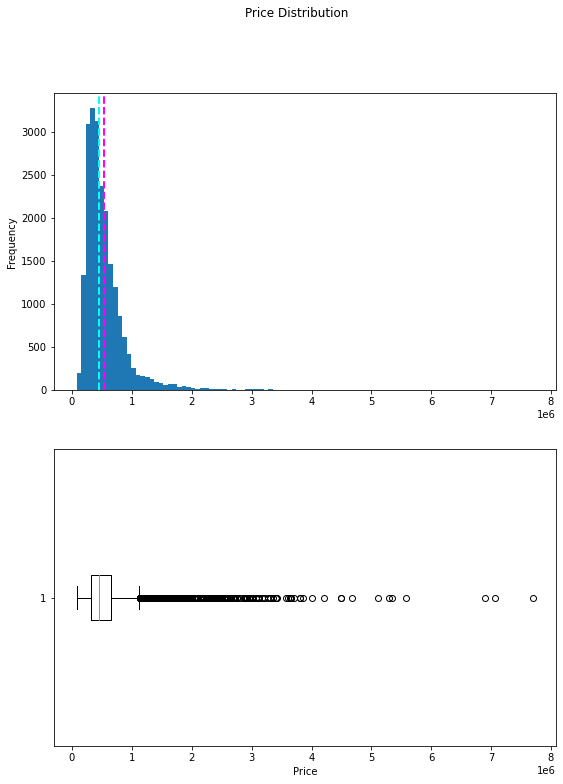

In [40]:
## Plot a boxplot and histogram to show the distribution of prices 

# Get the label column
label = housing_data['price']


# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram   
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Price')

# Add a title to the Figure
fig.suptitle('Price Distribution')

# Show the figure
fig.show()

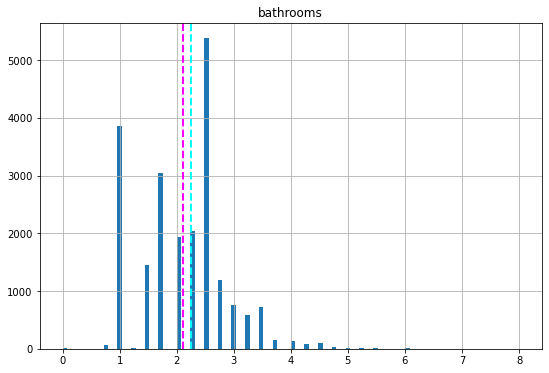

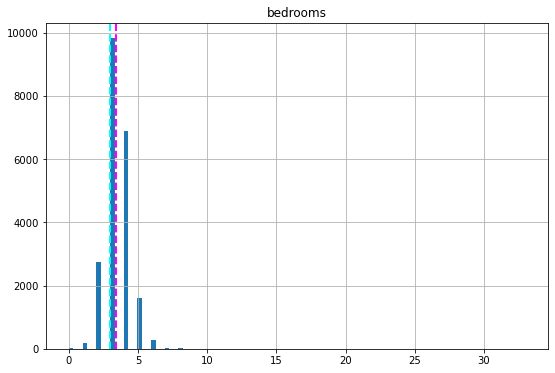

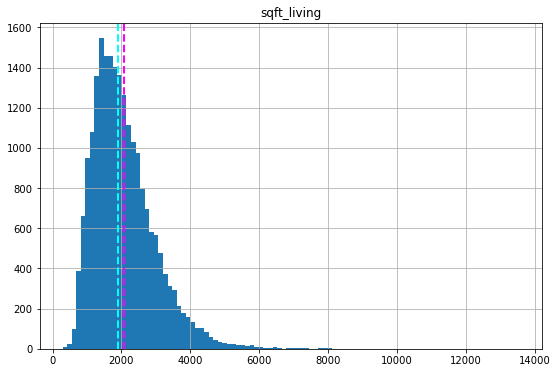

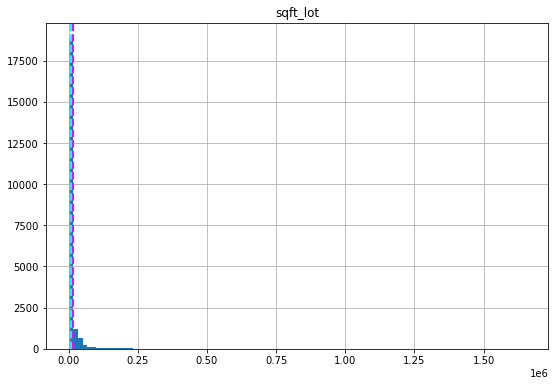

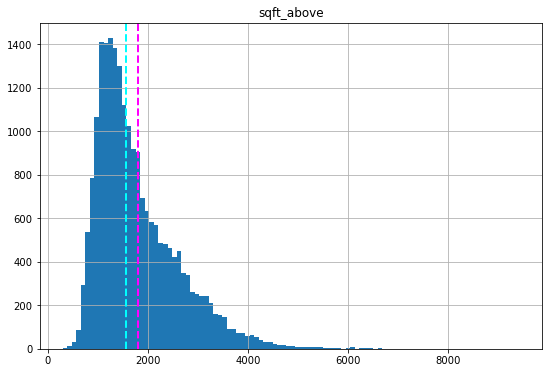

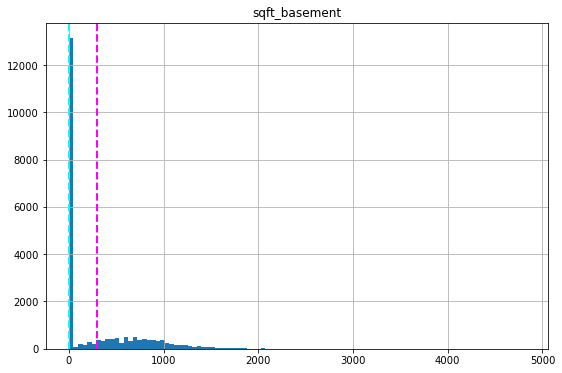

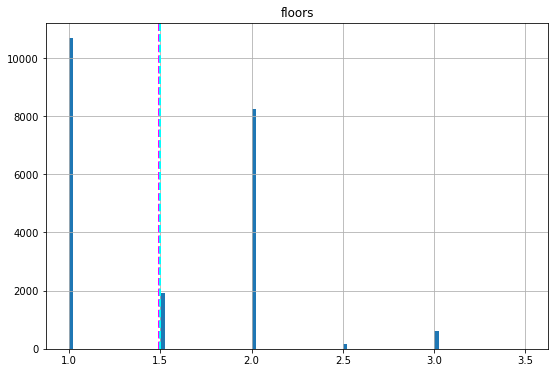

In [43]:
## plot histogram for each numeric features 

for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = housing_data[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()


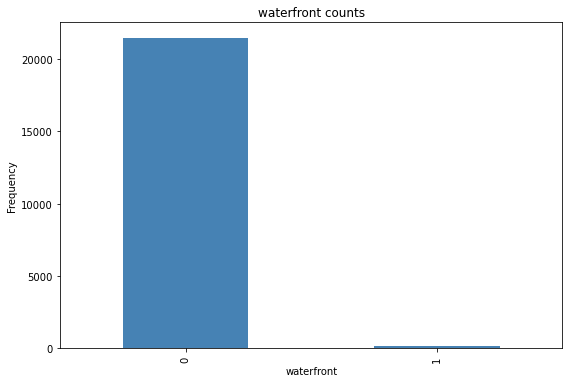

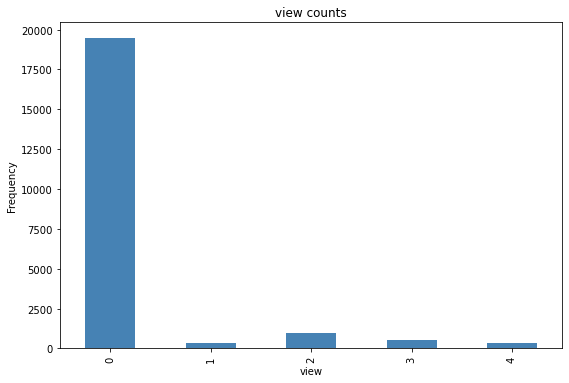

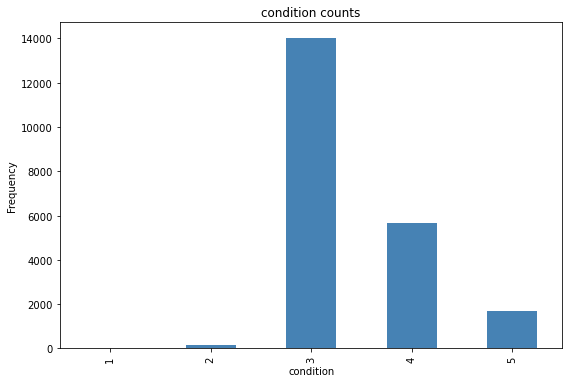

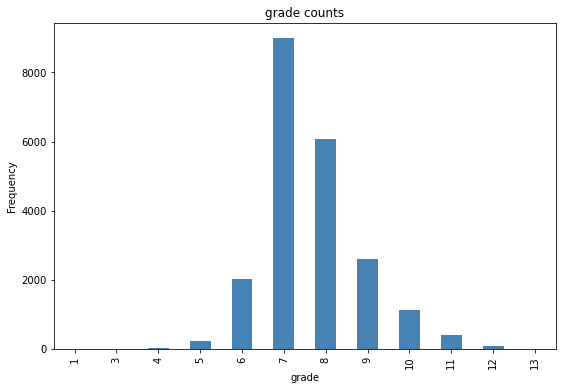

In [44]:
## Plot a bar chart for each categorical feature count

categorical_features = ['waterfront', 'view', 'condition', 'grade']

for col in categorical_features:
    counts = housing_data[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

## Train Model 
Now that we've examined the data, it's time to utilise it to train a regression model that makes use of the features we've discovered that could possibly predict the price label.

In [45]:
# Seperate features and label
X, y = housing_data[['bathrooms', 'bedrooms','sqft_living', 'sqft_lot', 'sqft_above','sqft_basement',
                               'floors','waterfront', 'view', 'condition', 'grade' ]].values, housing_data['price'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[1.0000e+00 3.0000e+00 1.1800e+03 5.6500e+03 1.1800e+03 0.0000e+00
  1.0000e+00 0.0000e+00 0.0000e+00 3.0000e+00 7.0000e+00]
 [2.2500e+00 3.0000e+00 2.5700e+03 7.2420e+03 2.1700e+03 4.0000e+02
  2.0000e+00 0.0000e+00 0.0000e+00 3.0000e+00 7.0000e+00]
 [1.0000e+00 2.0000e+00 7.7000e+02 1.0000e+04 7.7000e+02 0.0000e+00
  1.0000e+00 0.0000e+00 0.0000e+00 3.0000e+00 6.0000e+00]
 [3.0000e+00 4.0000e+00 1.9600e+03 5.0000e+03 1.0500e+03 9.1000e+02
  1.0000e+00 0.0000e+00 0.0000e+00 5.0000e+00 7.0000e+00]
 [2.0000e+00 3.0000e+00 1.6800e+03 8.0800e+03 1.6800e+03 0.0000e+00
  1.0000e+00 0.0000e+00 0.0000e+00 3.0000e+00 8.0000e+00]
 [4.5000e+00 4.0000e+00 5.4200e+03 1.0193e+05 3.8900e+03 1.5300e+03
  1.0000e+00 0.0000e+00 0.0000e+00 3.0000e+00 1.1000e+01]
 [2.2500e+00 3.0000e+00 1.7150e+03 6.8190e+03 1.7150e+03 0.0000e+00
  2.0000e+00 0.0000e+00 0.0000e+00 3.0000e+00 7.0000e+00]
 [1.5000e+00 3.0000e+00 1.0600e+03 9.7110e+03 1.0600e+03 0.0000e+00
  1.0000e+00 0.0000e+00 0.0000e+00 3.000

In [46]:
## Split training and validation data set 

from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 15129 rows
Test Set: 6484 rows


In [47]:
# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression()


## Evaluate Trained Model
We can use the model we trained to prices for the features we kept back in our validation dataset. To determine how well (or not!) the  trained model is doing, we can compare these predictions to the actual label values.

In [48]:
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [ 362369. 1415447.  380201.  469454.  928423.  351901.  405837.  615990.
  675477. 1262378.]
Actual labels   :  [ 297000 1580000  562100  631500  780000  485000  340000  335606  425000
  490000]


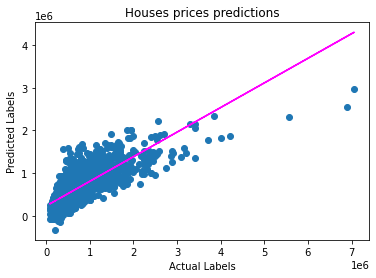

In [49]:
# Create a scatterplot that compare the predictions to the actual values 

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Houses prices predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## Evaluation Metrics 
Calculates the basic evaluation metrics for evaluating the quality of the model

In [50]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 55729039785.36401
RMSE: 236069.9891671197
R2: 0.5945830991000285


## Conclusion 
The R-squared of the model is 0.59. This shows that the  model has some predictive power but we can definetly do better! Also, the square root of MSE - which represents the average price by which the predictions are wrong - is still quite large. The next step could be to try a different algorithm in addition to featuring engineering - to come up with a better model with better accuracy!

## Try a Different Algorithm


In [51]:
## Decision Tree model

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
model = DecisionTreeRegressor().fit(X_train, y_train)
print (model, "\n")

# Visualize the model tree
tree = export_text(model)
print(tree)


DecisionTreeRegressor() 

|--- feature_10 <= 8.50
|   |--- feature_2 <= 2028.00
|   |   |--- feature_10 <= 7.50
|   |   |   |--- feature_10 <= 6.50
|   |   |   |   |--- feature_2 <= 1135.00
|   |   |   |   |   |--- feature_3 <= 5158.50
|   |   |   |   |   |   |--- feature_2 <= 785.00
|   |   |   |   |   |   |   |--- feature_4 <= 605.00
|   |   |   |   |   |   |   |   |--- feature_2 <= 555.00
|   |   |   |   |   |   |   |   |   |--- feature_4 <= 500.00
|   |   |   |   |   |   |   |   |   |   |--- feature_3 <= 4805.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- feature_3 >  4805.00
|   |   |   |   |   |   |   |   |   |   |   |--- value: [80000.00]
|   |   |   |   |   |   |   |   |   |--- feature_4 >  500.00
|   |   |   |   |   |   |   |   |   |   |--- feature_2 <= 530.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- feature_2 >  530.00


In [52]:
# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)



MSE: 79101931630.06705
RMSE: 281250.65623046475
R2: 0.4245502865261013


The tree-based model does'nt seem to perform better than the linear regression model. In a different project, I will perform feature engineering to the features and re-run  both the linear and decision tree model. 